In [2]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j]=C[i,j]+A[i,k]*B[k,j]
            end
        end
    end
C
end


# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
#można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [3]:
using DataFrames

dff = DataFrame()
dff[:type] = String[]
dff[:size] = Int32[]
dff[:time] = Float64[]

for size = 100:50:500
    for typ = ["naive", "better", "blas"]
        for proba = 1:10
            A=rand(size, size)
            B=rand(size, size)
            push!(dff[:type], typ)
            push!(dff[:size], size)
            if typ == "naive"
                push!(dff[:time], @elapsed naive_multiplication(A,B))
            elseif typ == "better"
                push!(dff[:time], @elapsed better_multiplication(A,B))
            elseif typ == "blas"
                push!(dff[:time], @elapsed (A*B))
            end
        end
    end
end

dff

270×3 DataFrame
│ Row │ type   │ size  │ time       │
│     │ String │ Int32 │ Float64    │
├─────┼────────┼───────┼────────────┤
│ 1   │ naive  │ 100   │ 0.00350057 │
│ 2   │ naive  │ 100   │ 0.00418777 │
│ 3   │ naive  │ 100   │ 0.00400057 │
│ 4   │ naive  │ 100   │ 0.00355627 │
│ 5   │ naive  │ 100   │ 0.00353087 │
│ 6   │ naive  │ 100   │ 0.00330818 │
│ 7   │ naive  │ 100   │ 0.00352787 │
│ 8   │ naive  │ 100   │ 0.00333637 │
│ 9   │ naive  │ 100   │ 0.00345177 │
│ 10  │ naive  │ 100   │ 0.00351877 │
⋮
│ 260 │ better │ 500   │ 0.236315   │
│ 261 │ blas   │ 500   │ 0.00312738 │
│ 262 │ blas   │ 500   │ 0.00211238 │
│ 263 │ blas   │ 500   │ 0.00199809 │
│ 264 │ blas   │ 500   │ 0.00197109 │
│ 265 │ blas   │ 500   │ 0.0220213  │
│ 266 │ blas   │ 500   │ 0.00664715 │
│ 267 │ blas   │ 500   │ 0.00199869 │
│ 268 │ blas   │ 500   │ 0.00225118 │
│ 269 │ blas   │ 500   │ 0.0768483  │
│ 270 │ blas   │ 500   │ 0.00246728 │

In [4]:
using Statistics
time_gr=by(dff, [:type,:size]) do SubGroup
    DataFrame( mean = mean(SubGroup[:time]), var = sqrt(var(SubGroup[:time])) )
end
sort(time_gr, [:type, :size])

27×4 DataFrame
│ Row │ type   │ size  │ mean        │ var         │
│     │ String │ Int32 │ Float64     │ Float64     │
├─────┼────────┼───────┼─────────────┼─────────────┤
│ 1   │ better │ 100   │ 0.00312819  │ 0.00249203  │
│ 2   │ better │ 150   │ 0.00638652  │ 7.09631e-5  │
│ 3   │ better │ 200   │ 0.0146749   │ 0.000253042 │
│ 4   │ better │ 250   │ 0.0294999   │ 0.00235665  │
│ 5   │ better │ 300   │ 0.0510516   │ 0.00178986  │
│ 6   │ better │ 350   │ 0.0793108   │ 0.00249169  │
│ 7   │ better │ 400   │ 0.119634    │ 0.00276805  │
│ 8   │ better │ 450   │ 0.168852    │ 0.00196533  │
│ 9   │ better │ 500   │ 0.233523    │ 0.00450519  │
│ 10  │ blas   │ 100   │ 0.000118269 │ 0.000206823 │
⋮
│ 17  │ blas   │ 450   │ 0.0036437   │ 0.00639406  │
│ 18  │ blas   │ 500   │ 0.0121443   │ 0.0235637   │
│ 19  │ naive  │ 100   │ 0.0035919   │ 0.000280927 │
│ 20  │ naive  │ 150   │ 0.0184053   │ 0.015176    │
│ 21  │ naive  │ 200   │ 0.0428185   │ 0.0297205   │
│ 22  │ naive  │ 250   │ 0.0672187   │ 0.0229988   │
│ 23  │ naive  │ 300   │ 0.106764    │ 0.0260888   │
│ 24  │ naive  │ 350   │ 0.167183    │ 0.0252309   │
│ 25  │ naive  │ 400   │ 0.246435    │ 0.0246738   │
│ 26  │ naive  │ 450   │ 0.353706    │ 0.0333449   │
│ 27  │ naive  │ 500   │ 0.487046    │ 0.0479513   │

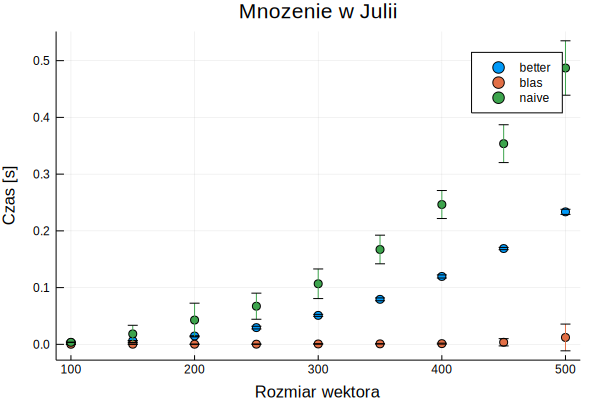

In [5]:
using Plots
scatter(time_gr[:size], time_gr[:mean], group=time_gr[:type], yerr=time_gr[:var], title="Mnozenie w Julii", xlabel="Rozmiar wektora", ylabel="Czas [s]" )

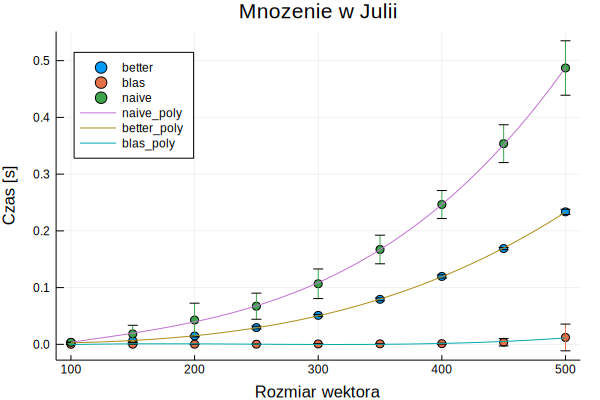

In [6]:
using Plots
scatter(time_gr[:size], time_gr[:mean], group=time_gr[:type], yerr=time_gr[:var], title="Mnozenie w Julii", xlabel="Rozmiar wektora", ylabel="Czas [s]" )

using Polynomials

naive_x = (time_gr[(time_gr[:type].== "naive"),:])[:size]
naive_y = (time_gr[(time_gr[:type].== "naive"),:])[:mean]
fit_naive = polyfit(naive_x, naive_y,3)

better_x = (time_gr[(time_gr[:type].== "better"),:])[:size]
better_y = (time_gr[(time_gr[:type].== "better"),:])[:mean]
fit_better = polyfit(better_x, better_y,3)

blas_x = (time_gr[(time_gr[:type].== "blas"),:])[:size]
blas_y = (time_gr[(time_gr[:type].== "blas"),:])[:mean]
fit_blas = polyfit(blas_x, blas_y,3)


xd = 100:1:500
plot!(xd, polyval(fit_naive, xd), label="naive_poly")
plot!(xd, polyval(fit_better, xd), label="better_poly")
plot!(xd, polyval(fit_blas, xd), label="blas_poly", legend=:topleft)

In [7]:
using CSV
input="mnozenia.csv"
dffc=CSV.read(input, delim=";")

270×3 DataFrame
│ Row │ type    │ size   │ time     │
│     │ String⍰ │ Int64⍰ │ Float64⍰ │
├─────┼─────────┼────────┼──────────┤
│ 1   │ naive   │ 100    │ 0.005914 │
│ 2   │ better  │ 100    │ 0.005204 │
│ 3   │ blas    │ 100    │ 0.000733 │
│ 4   │ naive   │ 100    │ 0.005339 │
│ 5   │ better  │ 100    │ 0.00506  │
│ 6   │ blas    │ 100    │ 0.000714 │
│ 7   │ naive   │ 100    │ 0.005351 │
│ 8   │ better  │ 100    │ 0.00515  │
│ 9   │ blas    │ 100    │ 0.000716 │
│ 10  │ naive   │ 100    │ 0.00532  │
⋮
│ 260 │ better  │ 500    │ 0.624307 │
│ 261 │ blas    │ 500    │ 0.083104 │
│ 262 │ naive   │ 500    │ 1.6094   │
│ 263 │ better  │ 500    │ 0.625956 │
│ 264 │ blas    │ 500    │ 0.08283  │
│ 265 │ naive   │ 500    │ 1.63024  │
│ 266 │ better  │ 500    │ 0.629651 │
│ 267 │ blas    │ 500    │ 0.083763 │
│ 268 │ naive   │ 500    │ 1.60531  │
│ 269 │ better  │ 500    │ 0.624469 │
│ 270 │ blas    │ 500    │ 0.083045 │

In [8]:
using Statistics
time_gr=by(dffc, [:type,:size]) do SubGroup
    DataFrame( mean = mean(SubGroup[:time]), var = sqrt(var(SubGroup[:time])) )
end
sort(time_gr, [:type, :size])

27×4 DataFrame
│ Row │ type    │ size   │ mean      │ var         │
│     │ String⍰ │ Int64⍰ │ Float64   │ Float64     │
├─────┼─────────┼────────┼───────────┼─────────────┤
│ 1   │ better  │ 100    │ 0.0050978 │ 6.68212e-5  │
│ 2   │ better  │ 150    │ 0.0171068 │ 0.000106106 │
│ 3   │ better  │ 200    │ 0.0404508 │ 0.000304564 │
│ 4   │ better  │ 250    │ 0.0800741 │ 0.00215083  │
│ 5   │ better  │ 300    │ 0.136369  │ 0.0027841   │
│ 6   │ better  │ 350    │ 0.215499  │ 0.00194104  │
│ 7   │ better  │ 400    │ 0.320507  │ 0.000916193 │
│ 8   │ better  │ 450    │ 0.456191  │ 0.00133262  │
│ 9   │ better  │ 500    │ 0.625947  │ 0.0016642   │
│ 10  │ blas    │ 100    │ 0.0007255 │ 1.71416e-5  │
⋮
│ 17  │ blas    │ 450    │ 0.0606585 │ 0.000561046 │
│ 18  │ blas    │ 500    │ 0.0830317 │ 0.000621945 │
│ 19  │ naive   │ 100    │ 0.0054306 │ 0.000173773 │
│ 20  │ naive   │ 150    │ 0.0192191 │ 0.000168478 │
│ 21  │ naive   │ 200    │ 0.0467536 │ 0.000311569 │
│ 22  │ naive   │ 250    │ 0.0978206 │ 0.00195027  │
│ 23  │ naive   │ 300    │ 0.166473  │ 0.00544608  │
│ 24  │ naive   │ 350    │ 0.271722  │ 0.00196371  │
│ 25  │ naive   │ 400    │ 0.555115  │ 0.00230822  │
│ 26  │ naive   │ 450    │ 1.05683   │ 0.0082384   │
│ 27  │ naive   │ 500    │ 1.60651   │ 0.00992948  │

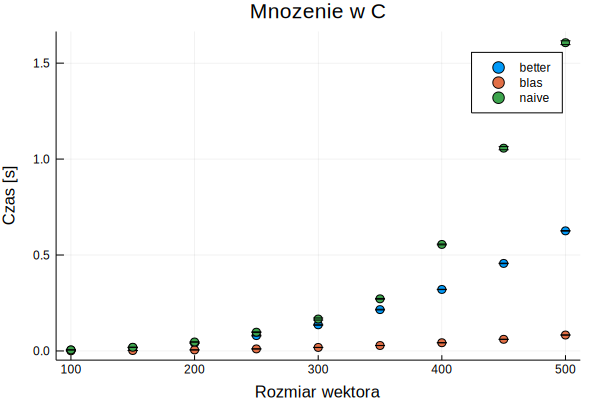

In [9]:
using Plots
scatter(time_gr[:size], time_gr[:mean], group=time_gr[:type], yerr=time_gr[:var], title="Mnozenie w C", xlabel="Rozmiar wektora", ylabel="Czas [s]" )

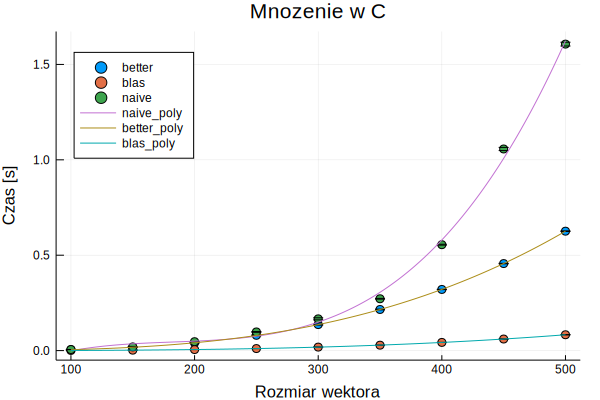

In [10]:
using Plots
scatter(time_gr[:size], time_gr[:mean], group=time_gr[:type], yerr=time_gr[:var], title="Mnozenie w C", xlabel="Rozmiar wektora", ylabel="Czas [s]" )

using Polynomials

naive_x = (time_gr[(time_gr[:type].== "naive"),:])[:size]
naive_y = (time_gr[(time_gr[:type].== "naive"),:])[:mean]
fit_naive = polyfit(naive_x, naive_y,3)

better_x = (time_gr[(time_gr[:type].== "better"),:])[:size]
better_y = (time_gr[(time_gr[:type].== "better"),:])[:mean]
fit_better = polyfit(better_x, better_y,3)

blas_x = (time_gr[(time_gr[:type].== "blas"),:])[:size]
blas_y = (time_gr[(time_gr[:type].== "blas"),:])[:mean]
fit_blas = polyfit(blas_x, blas_y,3)


xd = 100:1:500
plot!(xd, polyval(fit_naive, xd), label="naive_poly")
plot!(xd, polyval(fit_better, xd), label="better_poly")
plot!(xd, polyval(fit_blas, xd), label="blas_poly", legend=:topleft)